In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.model_selection import train_test_split
# %matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (30, 8)
matplotlib.rcParams.update({'font.size': 40})

/home/srikar/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


**Getting UCI housing data from sklearn**

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
df_bos=pd.DataFrame(boston.data)

**Description of the dataset**

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

**Looking at values inside the dataset**

In [5]:
df_bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Adding description to collumns for readability**

In [6]:
df_bos.columns = boston.feature_names
df_bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df_bos.to_csv("housing.csv") #saving the dataset in local machine

In [8]:
boston.target.shape #shape of target variable

(506,)

In [9]:
df_bos['PRICE'] = boston.target #target variable aka Price in our case

In [10]:
df_bos.head() #complete Data in the dataframe 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
df_bos.describe() #getting count, mean, std, min,etc.. from our data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**PLOTTING data against House PRICES- For Analysis**

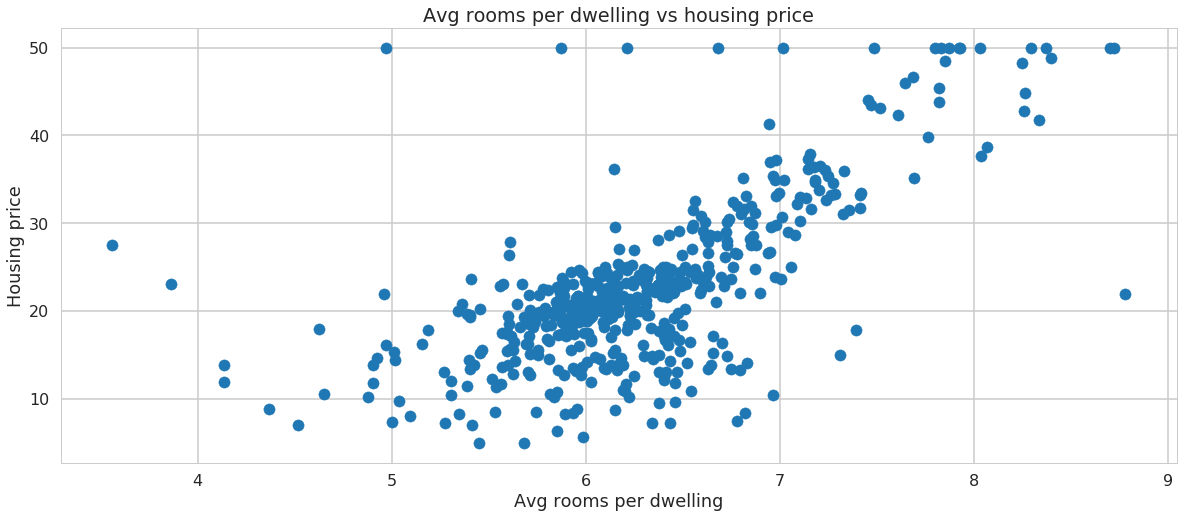

In [18]:
plt.scatter(df_bos.RM, df_bos.PRICE)
plt.xlabel('Avg rooms per dwelling')
plt.ylabel('Housing price')
plt.title('Avg rooms per dwelling vs housing price')


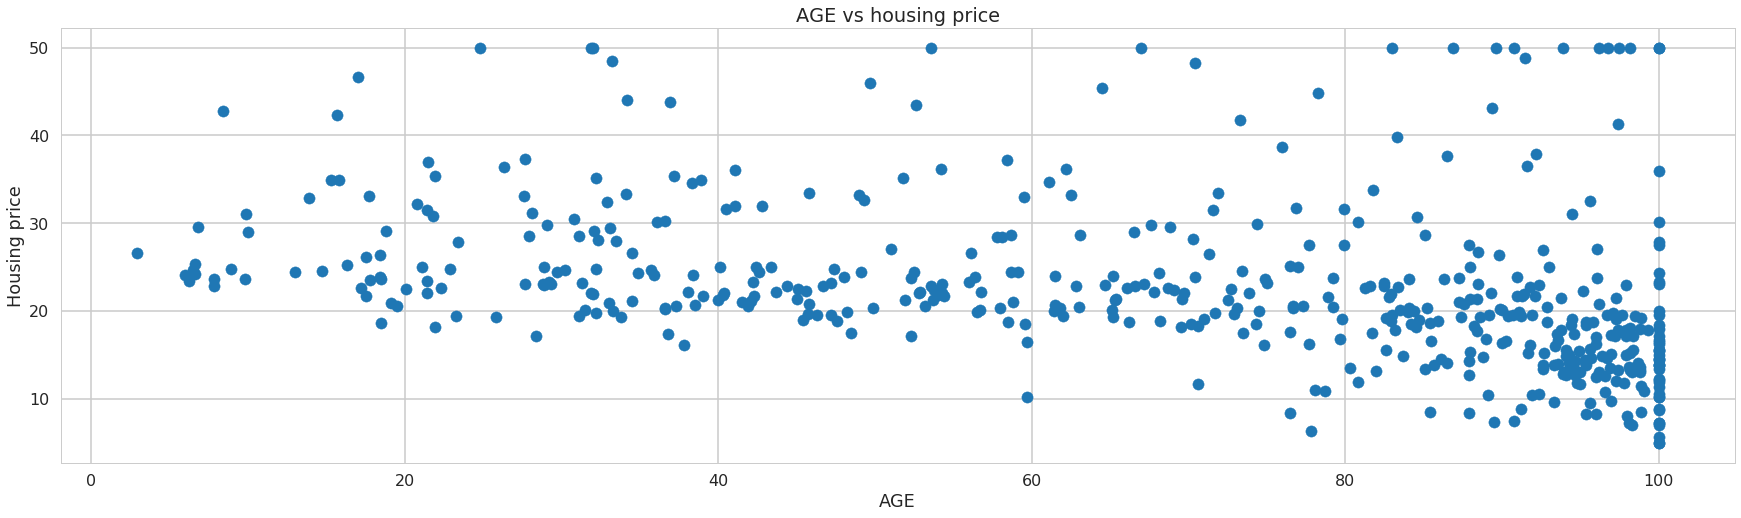

In [20]:
plt.scatter(df_bos.AGE, df_bos.PRICE)
plt.xlabel('AGE')
plt.ylabel('Housing price')
plt.title('AGE vs housing price')


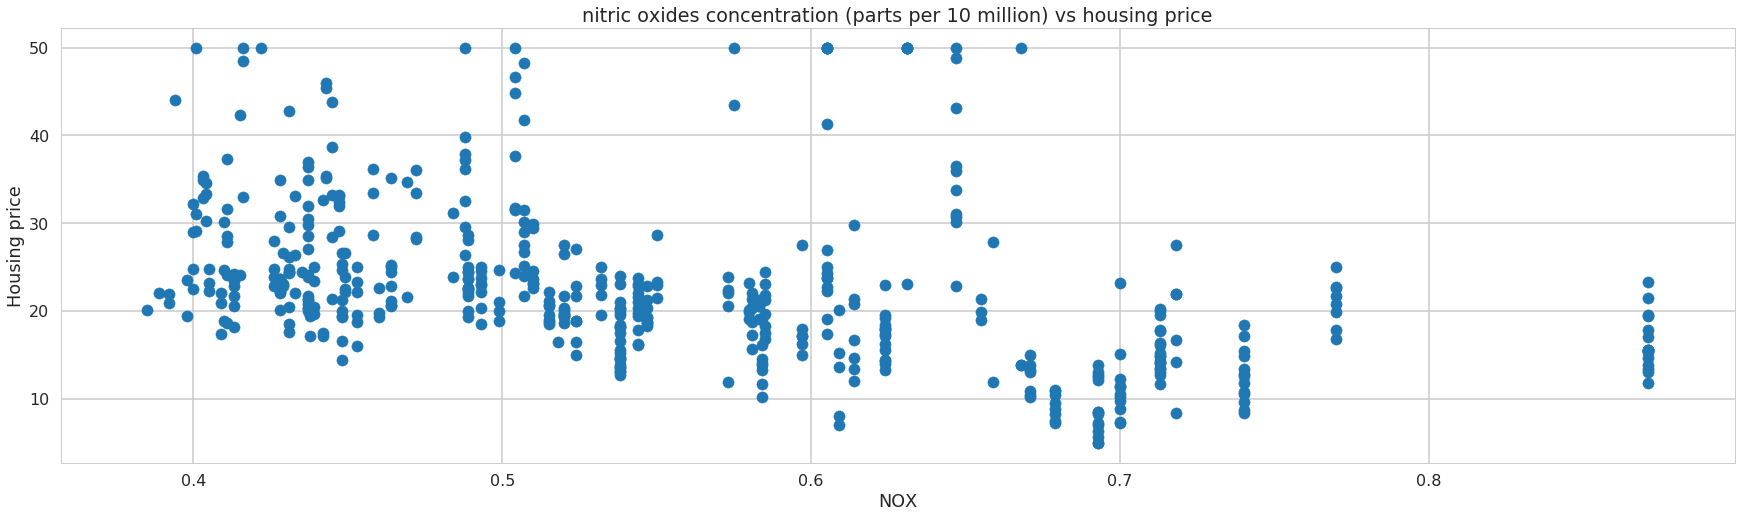

In [22]:
plt.scatter(df_bos.NOX, df_bos.PRICE)
plt.xlabel('NOX')
plt.ylabel('Housing price')
plt.title('nitric oxides concentration (parts per 10 million) vs housing price')


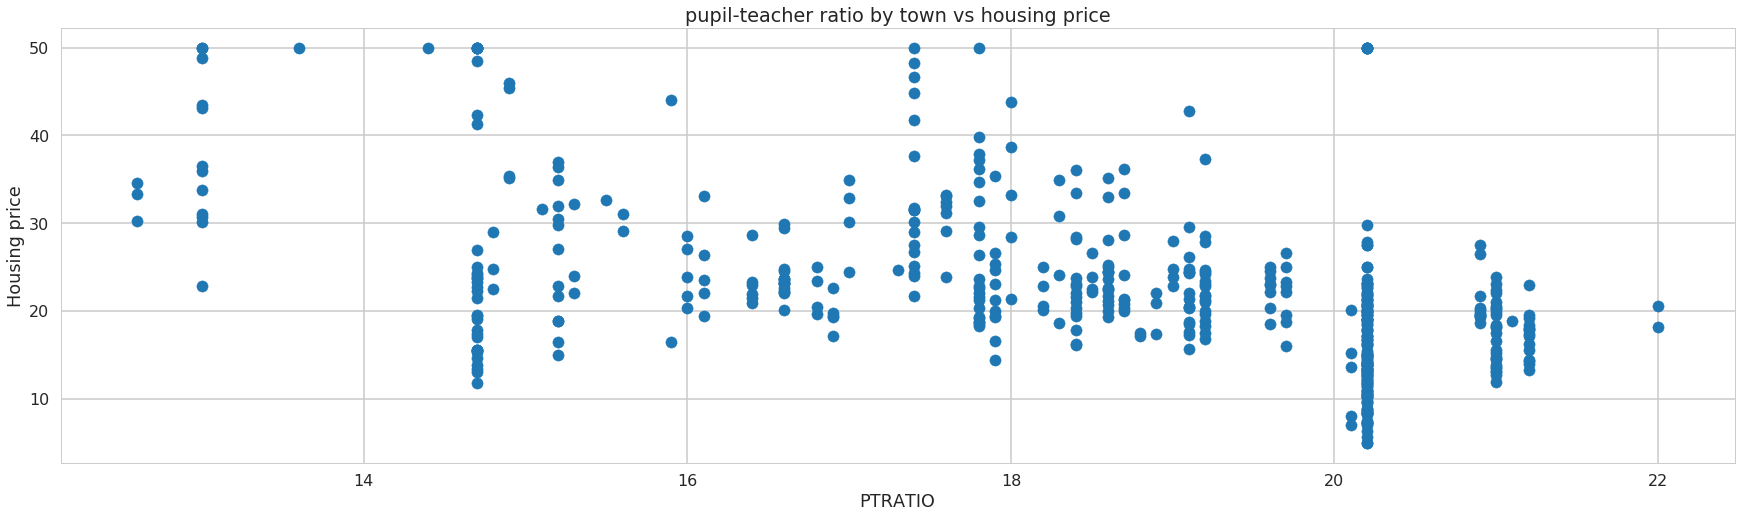

In [23]:
plt.scatter(df_bos.PTRATIO, df_bos.PRICE)
plt.xlabel('PTRATIO')
plt.ylabel('Housing price')
plt.title('pupil-teacher ratio by town vs housing price')

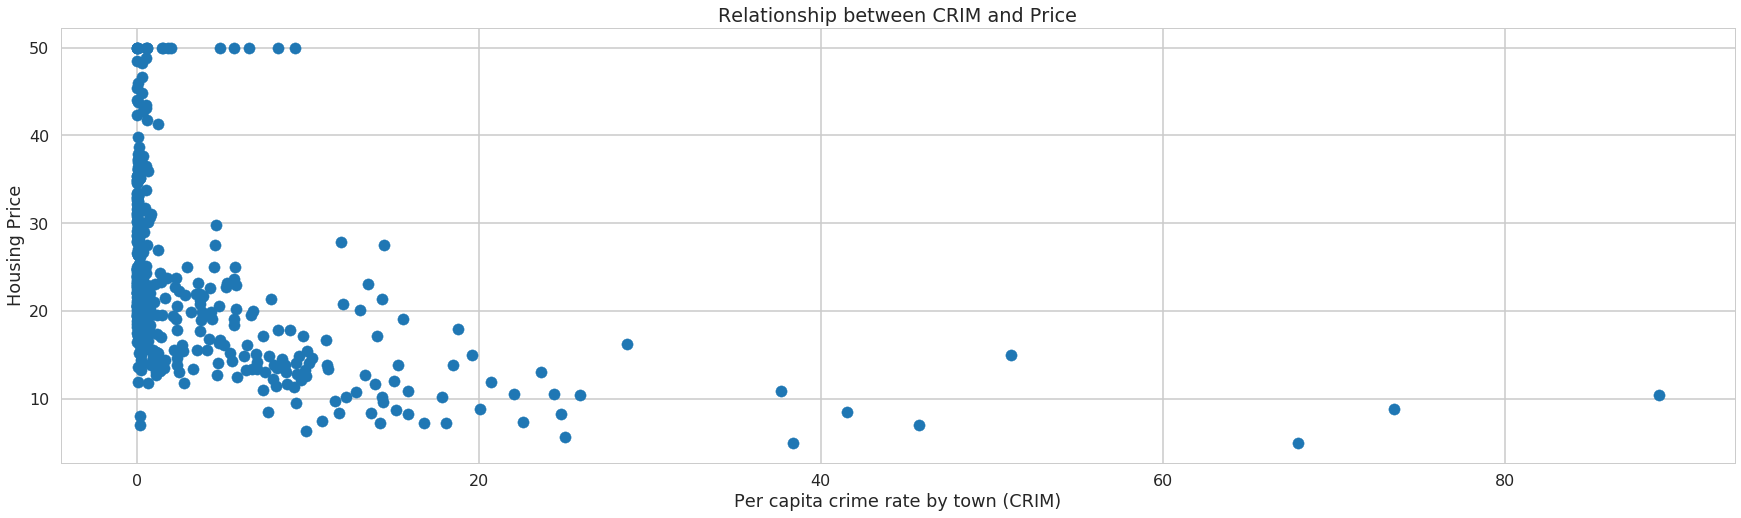

In [24]:
plt.scatter(df_bos.CRIM, df_bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

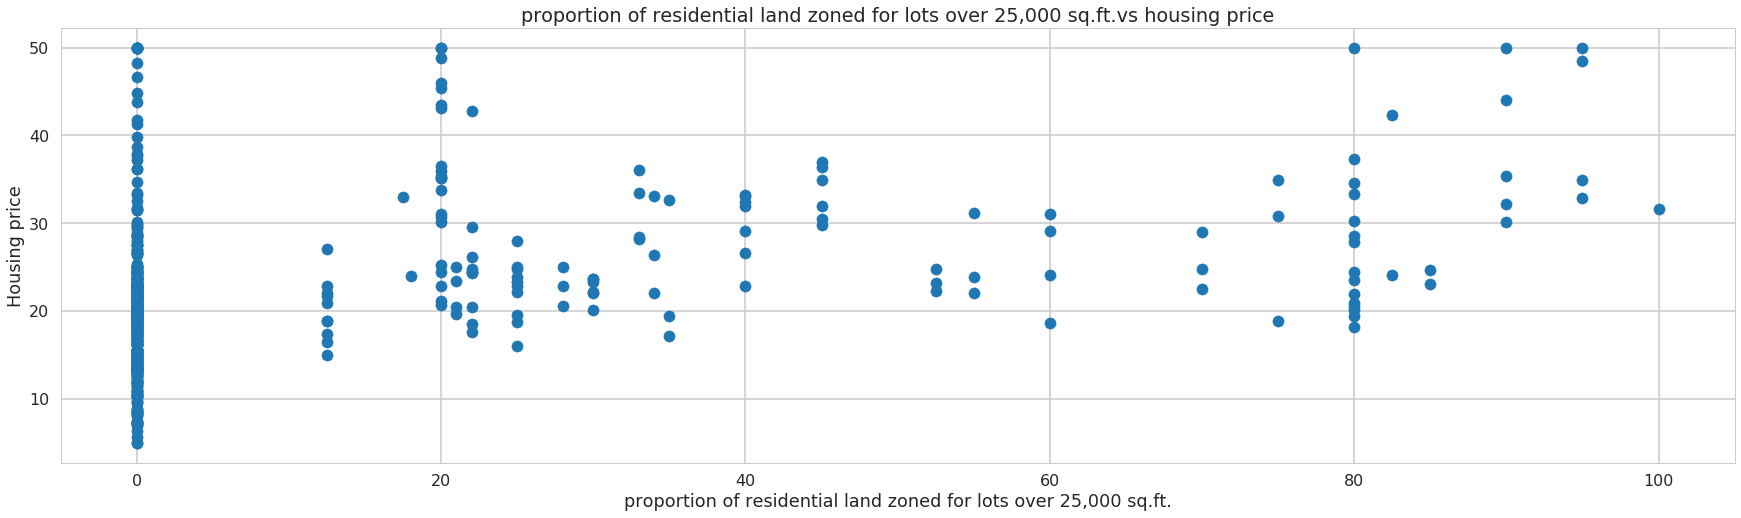

In [25]:
plt.scatter(df_bos.ZN, df_bos.PRICE)
plt.xlabel('proportion of residential land zoned for lots over 25,000 sq.ft.')
plt.ylabel('Housing price')
plt.title('proportion of residential land zoned for lots over 25,000 sq.ft.vs housing price')


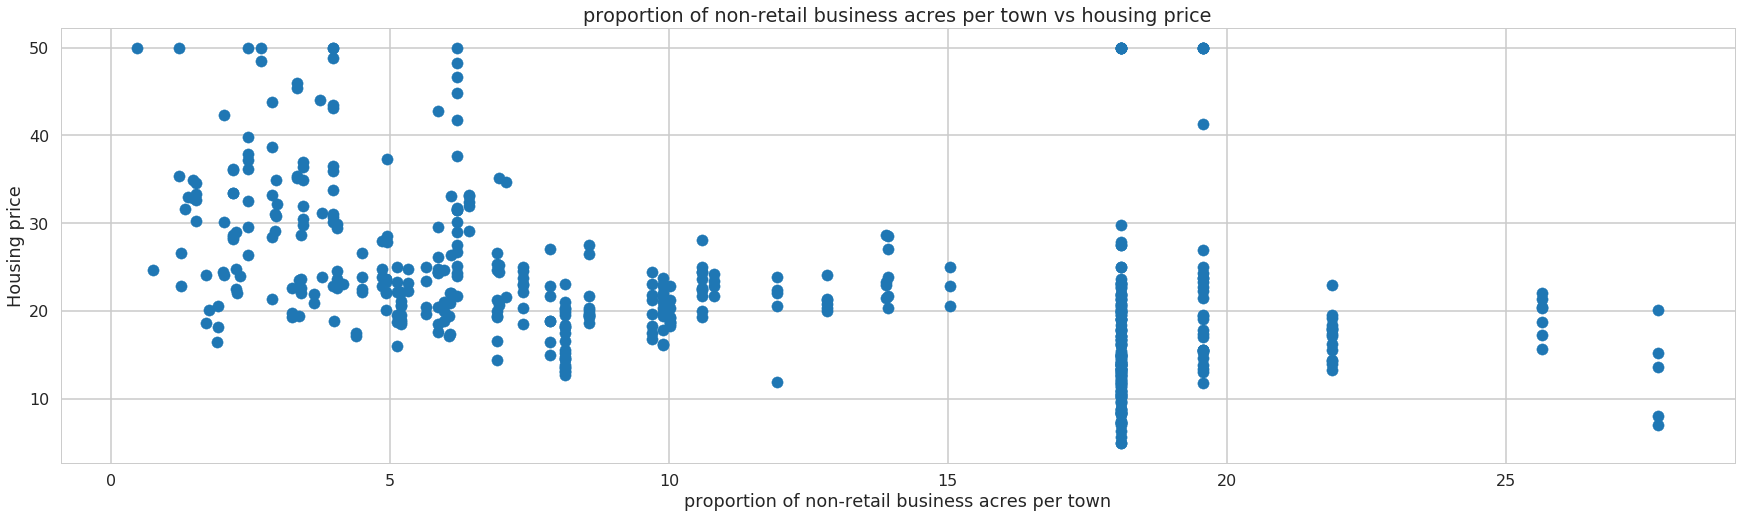

In [26]:
plt.scatter(df_bos.INDUS, df_bos.PRICE)
plt.xlabel('proportion of non-retail business acres per town')
plt.ylabel('Housing price')
plt.title('proportion of non-retail business acres per town vs housing price')

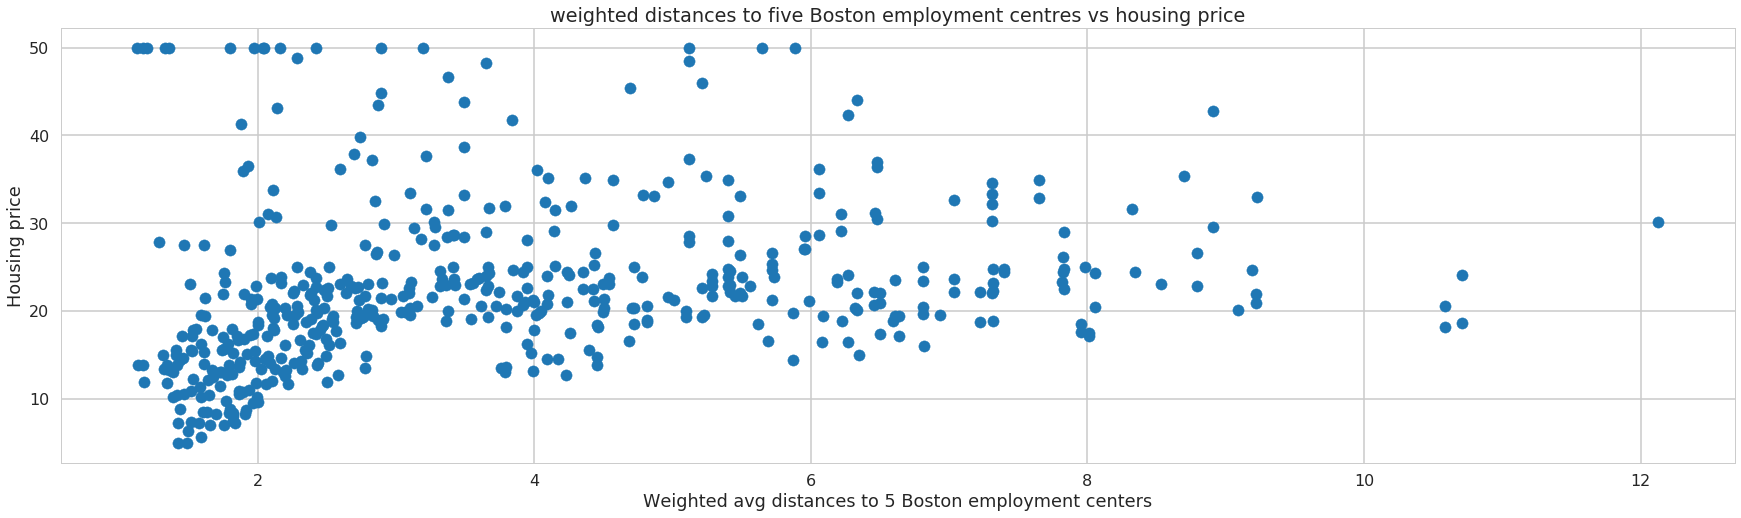

In [27]:
plt.scatter(df_bos.DIS, df_bos.PRICE)
plt.xlabel('Weighted avg distances to 5 Boston employment centers')
plt.ylabel('Housing price')
plt.title('weighted distances to five Boston employment centres vs housing price')


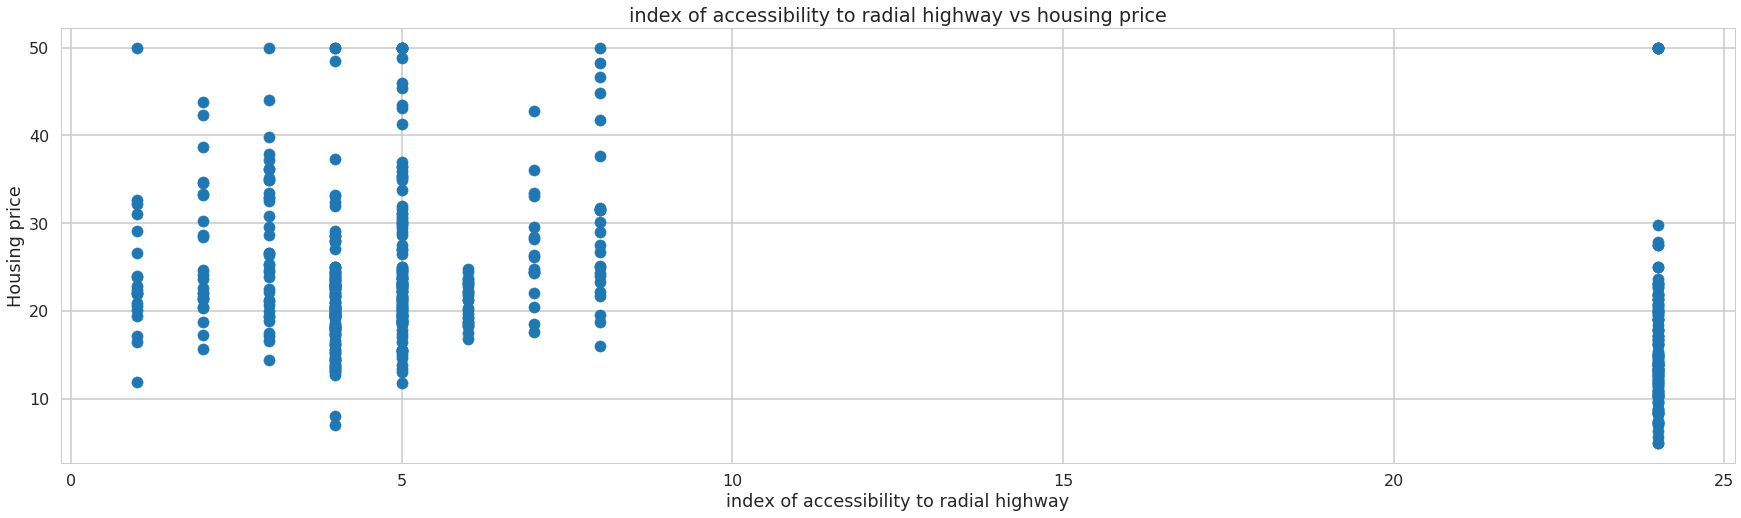

In [28]:
plt.scatter(df_bos.RAD, df_bos.PRICE)
plt.xlabel('index of accessibility to radial highway')
plt.ylabel('Housing price')
plt.title('index of accessibility to radial highway vs housing price')

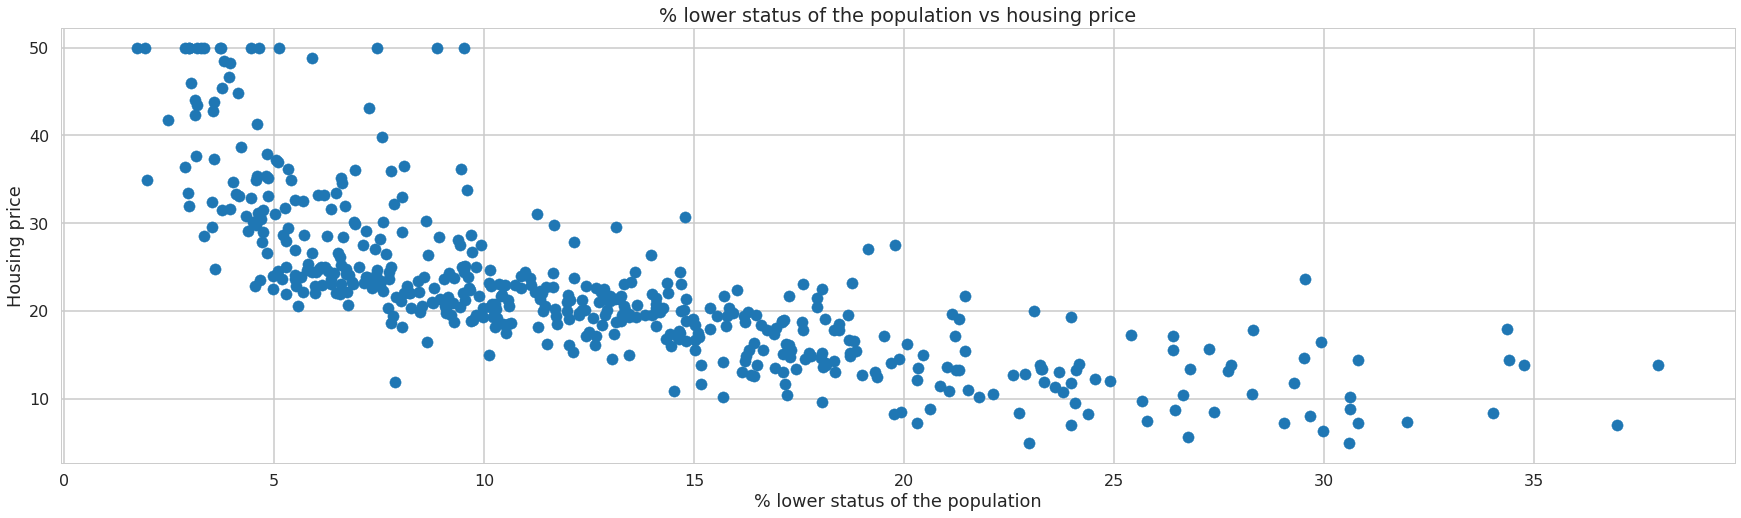

In [29]:
plt.scatter(df_bos.LSTAT, df_bos.PRICE)
plt.xlabel('% lower status of the population')
plt.ylabel('Housing price')
plt.title('% lower status of the population vs housing price')

In [33]:
df_corre= df_bos.corr(method='pearson', min_periods=1)

df_corre

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [34]:
print(sort(df_corre["PRICE"]))

[-0.73766273 -0.50778669 -0.48372516 -0.46853593 -0.42732077 -0.38583169
 -0.38162623 -0.37695457  0.17526018  0.24992873  0.33346082  0.36044534
  0.69535995  1.        ]


**Choosing -0.73766273 [LSTAT correlation with price] and 0.69535995 [RM correlation with price] from intution and analysis with Graph Plots**

**Plotting Best Fit Line for the data**

best fit line:
y = -34.67 + 9.10x


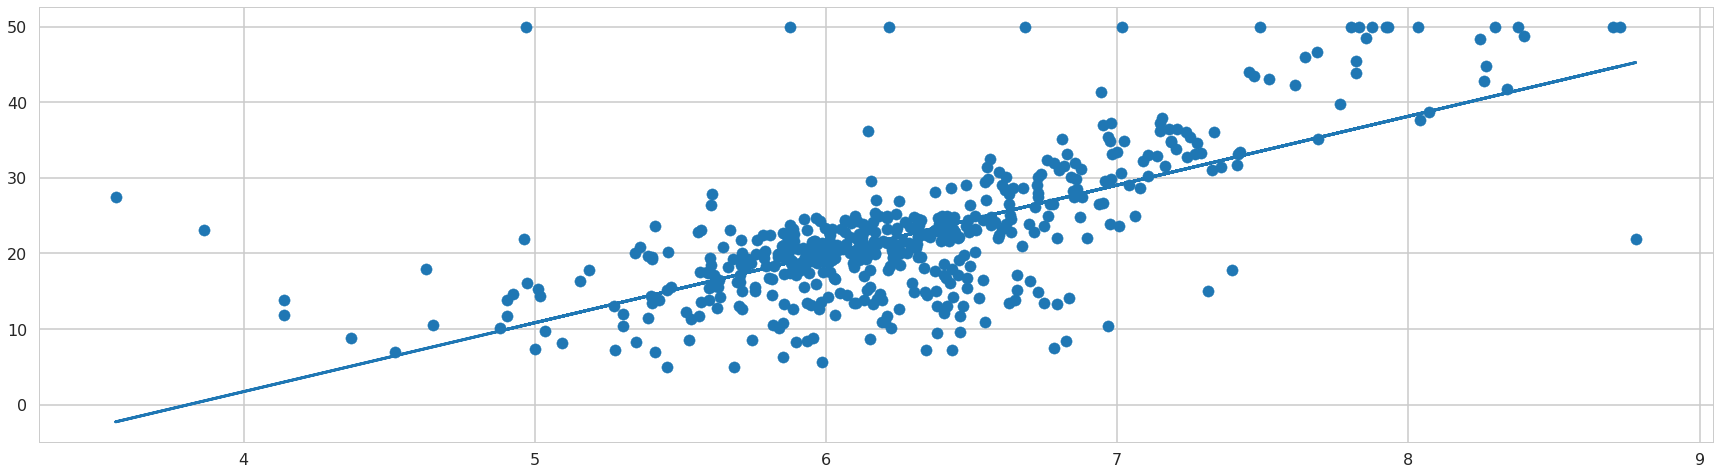

In [36]:
X= np.array(df_bos["RM"])
Y=np.array(df_bos["PRICE"])
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)


**Splitting Data into test and train**

In [37]:
train, test = train_test_split(df_bos, test_size=0.2)

In [38]:
train.head() #taking a peek at train dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88,24.0
18,0.80271,0.0,8.14,0.0,0.538,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69,20.2
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,21.1
458,7.75223,0.0,18.10,0.0,0.713,6.301,83.7,2.7831,24.0,666.0,20.2,272.21,16.23,14.9
75,0.09512,0.0,12.83,0.0,0.437,6.286,45.0,4.5026,5.0,398.0,18.7,383.23,8.94,21.4


In [39]:
test.head(10) #taking a peek at test dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
409,14.43830,0.0,18.10,0.0,0.597,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78,27.5
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,20.5
390,6.96215,0.0,18.10,0.0,0.700,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11,15.1
429,9.33889,0.0,18.10,0.0,0.679,6.380,95.6,1.9682,24.0,666.0,20.2,60.72,24.08,9.5
218,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5.0,276.0,16.4,396.90,17.92,21.5
217,0.07013,0.0,13.89,0.0,0.550,6.642,85.1,3.4211,5.0,276.0,16.4,392.78,9.69,28.7
464,7.83932,0.0,18.10,0.0,0.655,6.209,65.4,2.9634,24.0,666.0,20.2,396.90,13.22,21.4
317,0.24522,0.0,9.90,0.0,0.544,5.782,71.7,4.0317,4.0,304.0,18.4,396.90,15.94,19.8
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3.0,193.0,17.8,396.90,9.45,36.2
176,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11,23.2


**Plotting Histogram of Rooms per dwelling** Has normal distribution

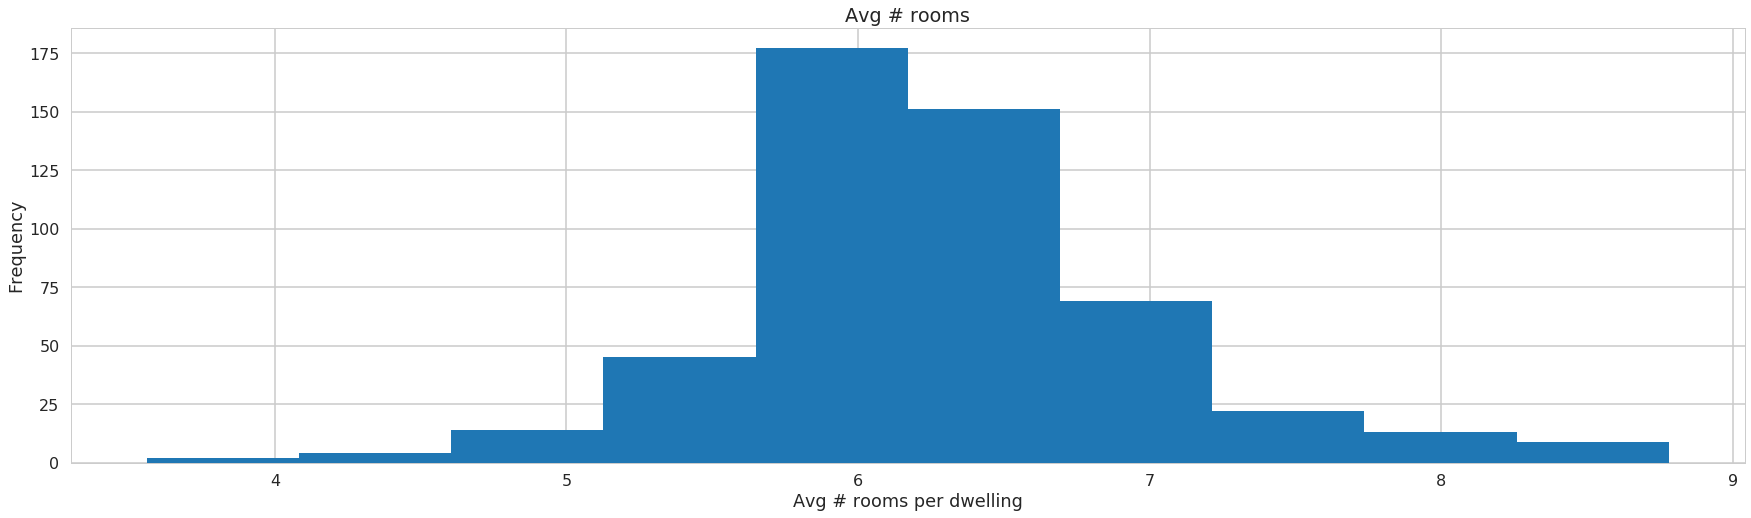

In [40]:
plt.hist(df_bos.RM)
plt.title("Avg # rooms")
plt.xlabel("Avg # rooms per dwelling")
plt.ylabel("Frequency")

In [48]:
len(train)#lenght of train data 
SiZe = len(test)

In [42]:
prices = df_bos["PRICE"]
sum_prices = prices.sum()
num_houses=len(prices)
avg_price = sum_prices/num_houses


**Ordinary Least Square Algorithm**

In [43]:
def my_OLS(inp,outp):
    n=num_houses
    a = inp.sum()
    b = outp.sum()
    c = (inp*outp).sum()
    d = (inp*inp).sum
    numer = (inp*outp).mean()-(inp.mean())*(outp.mean())
    denom = (inp*inp).mean() - (inp.mean())*(inp.mean())
    slope = float(numer)/float(denom)
    intercept = (outp.mean())-slope*(inp.mean())
    return(intercept,slope)

**Getting Beta_0 (intercept) and Beta_1 (Slope) values and training the model with train dataframe values**

In [44]:
RM_intercept,RM_slope = my_OLS(train["RM"],train["PRICE"])
print("intercept:") 
print(RM_intercept)

print("\n slope:")
print(RM_slope)

intercept:
-38.14318990711762

 slope:
9.654131699673913


In [45]:
def get_regression_predictions(inp, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + inp*slope
    return predicted_values

**Estimation for a house with 6 rooms **

In [46]:
my_RM = 6 #for 6 rooms
estimate = get_regression_predictions(my_RM, RM_intercept, RM_slope)
estimate

19.78160029092586

**Predicting Price Values for houses in Test**

In [49]:
array_RM = np.array(test["RM"])
estimate= []
for i in range(SiZe):
    my_RM = array_RM[i]
    estimate.append(get_regression_predictions(my_RM, RM_intercept, RM_slope))

In [59]:
preds = np.asarray(estimate)
test['My_OLS prediction']=preds

/home/srikar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Using sklearn Library for prediction**

**Predicting with 2 parameters**

In [78]:
# create X and y
feature_cols = ['RM','LSTAT']
X = test[feature_cols]
y = test.PRICE

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
inter = lm.intercept_
#print(inter)
slopee = lm.coef_
#print(slopee)
ar1 = lm.predict(X)
test["Library_Prediction(2)"] = ar1  #adding Library predictions to "test" dataframe for comparision

/home/srikar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


**Predicting with one parameter**

In [79]:
# create X and y
feature_cols = ['LSTAT']
X = test[feature_cols]
y = test.PRICE

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
inter = lm.intercept_
#print(inter)
slopee = lm.coef_
#print(slopee)
ar2 = lm.predict(X)
test["Library_Prediction(1)"] = ar2  #adding Library predictions to "test" dataframe for comparision

/home/srikar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
**Predicting with same parameter**

In [85]:
# create X and y
feature_cols = ['RM']
X = test[feature_cols]
y = test.PRICE

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
inter = lm.intercept_
#print(inter)
slopee = lm.coef_
#print(slopee)
ar3 = lm.predict(X)
test["Library_Prediction(same)"] = ar3  #adding Library predictions to "test" dataframe for comparision

/home/srikar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


** Dataframe below shows My_OLS predictions and predictions from sklearn Library**

In [86]:
test.head(40)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,My_OLS prediction,Library_Prediction(2),Library_Prediction(1),Library_Prediction(same)
409,14.43830,0.0,18.10,0.0,0.597,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78,27.5,28.006920,19.121128,16.237509,26.349519
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,20.5,19.405089,17.827118,17.918541,20.108068
390,6.96215,0.0,18.10,0.0,0.700,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11,15.1,17.010864,17.696413,18.663647,18.370829
429,9.33889,0.0,18.10,0.0,0.679,6.380,95.6,1.9682,24.0,666.0,20.2,60.72,24.08,9.5,23.450170,14.464117,12.330247,23.043161
218,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5.0,276.0,16.4,396.90,17.92,21.5,19.308548,17.804499,17.927628,20.038018
217,0.07013,0.0,13.89,0.0,0.550,6.642,85.1,3.4211,5.0,276.0,16.4,392.78,9.69,28.7,25.979553,26.077654,25.405946,24.878470
464,7.83932,0.0,18.10,0.0,0.655,6.209,65.4,2.9634,24.0,666.0,20.2,396.90,13.22,21.4,21.799314,22.117369,22.198356,21.845307
317,0.24522,0.0,9.90,0.0,0.544,5.782,71.7,4.0317,4.0,304.0,18.4,396.90,15.94,19.8,17.677000,18.784434,19.726786,18.854174
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3.0,193.0,17.8,396.90,9.45,36.2,21.171795,24.757168,25.624026,21.389982
176,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11,23.2,19.974683,23.886985,25.024306,20.521363


**MEAN SQUARE ERROR Calculation**

*Mean Square Error for My-OLS algorithm.*

In [91]:
#for our model
MSEFULL_myOLS = np.mean((test["PRICE"]-test["My_OLS prediction"])**2)
print(MSEFULL_myOLS)

52.29019370243787


In [88]:
#for library model with 2 parameters
MSEFULL_Library = np.mean((test["PRICE"]-test["Library_Prediction(2)"])**2)
print(MSEFULL_Library)

27.39948083873296


In [89]:
#for library model with 1 parameter (LSTAT)
MSEFULL_Library = np.mean((test["PRICE"]-test["Library_Prediction(1)"])**2)
print(MSEFULL_Library)

30.749169145503128


In [90]:
#for ibrary model with the same parameter used in My_OLS
MSEFULL_Library = np.mean((test["PRICE"]-test["Library_Prediction(same)"])**2)
print(MSEFULL_Library)

48.71843674401134
